<a href="https://colab.research.google.com/github/2021711396Honguiseong/-/blob/main/ASSIGNMENT_7_2021711396_%ED%99%8D%EC%9D%98%EC%84%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. Import Packages

In [67]:
!pip install tensorflow==2.6.0

### >>> DO NOT MODIFY >>> ###

import numpy as np
import tensorflow as tf

print("{:15}".format("tensorflow"), tf.__version__)         # (Tested) 2.6.0

tensorflow      2.6.0


In [68]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras import datasets, layers, models

In [69]:
(train_images, train_labels), (test_images, test_labels) =  tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
print('train image shape : {}'.format(train_images.shape))
print('train label shape : {}'.format(train_labels.shape))
print('test image shape : {}'.format(test_images.shape))
print('test label shape : {}'.format(test_labels.shape))

train image shape : (60000, 28, 28)
train label shape : (60000,)
test image shape : (10000, 28, 28)
test label shape : (10000,)


In [70]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

print('train image shape : {}'.format(train_images.shape))
print('test image shape : {}'.format(test_images.shape))

train image shape : (60000, 28, 28, 1)
test image shape : (10000, 28, 28, 1)


In [71]:
np.unique(train_images[0])

array([  0,   1,   2,   3,   4,   6,   7,  10,  12,  13,  15,  18,  23,
        29,  35,  36,  40,  41,  44,  48,  52,  54,  55,  56,  57,  58,
        61,  62,  64,  65,  66,  67,  69,  72,  73,  74,  75,  77,  80,
        82,  88,  92,  98,  99, 102, 106, 107, 109, 115, 117, 119, 121,
       122, 123, 127, 130, 134, 136, 141, 144, 145, 146, 150, 154, 155,
       156, 159, 161, 163, 164, 166, 167, 168, 169, 170, 171, 172, 173,
       175, 176, 177, 178, 179, 180, 181, 182, 183, 185, 186, 187, 188,
       189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 202,
       203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,
       216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228,
       229, 230, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242,
       243, 244, 245, 246, 248, 249, 250, 255], dtype=uint8)

In [72]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [73]:
np.unique(train_images[0])

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568627,
       0.02352941, 0.02745098, 0.03921569, 0.04705882, 0.05098039,
       0.05882353, 0.07058824, 0.09019608, 0.11372549, 0.1372549 ,
       0.14117647, 0.15686275, 0.16078431, 0.17254902, 0.18823529,
       0.20392157, 0.21176471, 0.21568627, 0.21960784, 0.22352941,
       0.22745098, 0.23921569, 0.24313725, 0.25098039, 0.25490196,
       0.25882353, 0.2627451 , 0.27058824, 0.28235294, 0.28627451,
       0.29019608, 0.29411765, 0.30196078, 0.31372549, 0.32156863,
       0.34509804, 0.36078431, 0.38431373, 0.38823529, 0.4       ,
       0.41568627, 0.41960784, 0.42745098, 0.45098039, 0.45882353,
       0.46666667, 0.4745098 , 0.47843137, 0.48235294, 0.49803922,
       0.50980392, 0.5254902 , 0.53333333, 0.55294118, 0.56470588,
       0.56862745, 0.57254902, 0.58823529, 0.60392157, 0.60784314,
       0.61176471, 0.62352941, 0.63137255, 0.63921569, 0.64313725,
       0.65098039, 0.65490196, 0.65882353, 0.6627451 , 0.66666

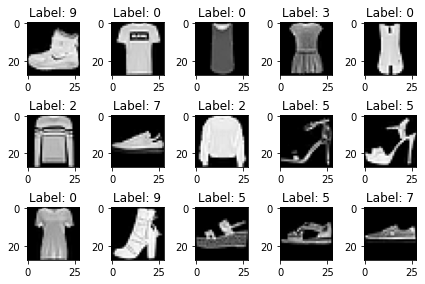

In [74]:
num_row = 3
num_col = 5# plot images
fig, axes = plt.subplots(num_row, num_col)
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(train_images[i][:,:,0], cmap='gray')
    ax.set_title('Label: {}'.format(train_labels[i]))
plt.tight_layout()
plt.show()

In [75]:
model_with_padding = models.Sequential()
# Padding option'same' maintains riginal shape
model_with_padding.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same')) 
model_with_padding.add(layers.MaxPooling2D((2, 2)))

model_with_padding.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 14, 14, 32)        0         
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [76]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 128)             

In [77]:
model.compile(optimizer='adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels) ,epochs=6)

Epoch 1/6
1875/1875 [==============================] - 58s 31ms/step - loss: 0.6902 - accuracy: 0.7500 - val_loss: 0.5613 - val_accuracy: 0.7970
Epoch 2/6
1875/1875 [==============================] - 57s 30ms/step - loss: 0.4868 - accuracy: 0.8234 - val_loss: 0.4682 - val_accuracy: 0.8310
Epoch 3/6
1875/1875 [==============================] - 57s 30ms/step - loss: 0.4232 - accuracy: 0.8472 - val_loss: 0.4316 - val_accuracy: 0.8458
Epoch 4/6
1875/1875 [==============================] - 57s 30ms/step - loss: 0.3880 - accuracy: 0.8582 - val_loss: 0.4336 - val_accuracy: 0.8389
Epoch 5/6
1875/1875 [==============================] - 57s 31ms/step - loss: 0.3599 - accuracy: 0.8675 - val_loss: 0.3920 - val_accuracy: 0.8571
Epoch 6/6
1875/1875 [==============================] - 57s 30ms/step - loss: 0.3359 - accuracy: 0.8766 - val_loss: 0.3789 - val_accuracy: 0.8655


In [78]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('Test Accuracy : {:.2f}'.format(test_acc))

313/313 - 2s - loss: 0.3789 - accuracy: 0.8655
Test Accuracy : 0.87


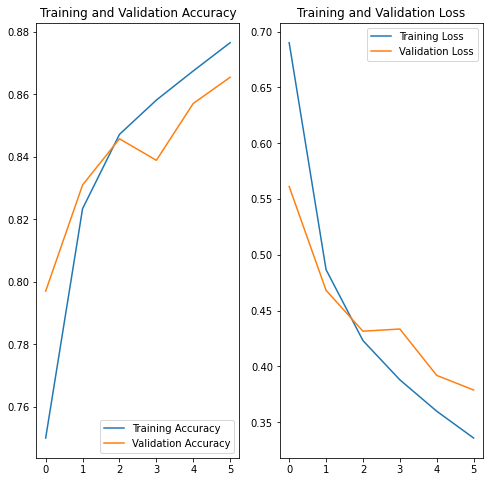

In [79]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(6)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [80]:
# retrieve weights from the second hidden layer
model.summary()

print('We will look into CNN filters of the 3rd layer : {}'.format(model.layers[4].name))
filters, biases = model.layers[4].get_weights()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 128)             

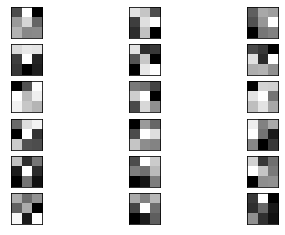

In [93]:
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1
# show the figure
plt.show()

In [94]:
extracted_model = tf.keras.models.Model(
    inputs=model.inputs,
    outputs=model.get_layer(name=model.layers[4].name).output,
)

extracted_model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38_input (InputLayer) [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 3, 3, 128)         73856     
Total params: 92,672
Trainable params: 92,672
Non-trainable params: 0
_______________________________________________________

Test image


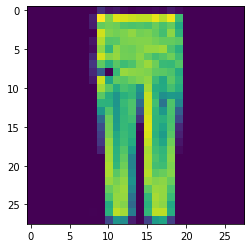

Feature maps of 3rd layer


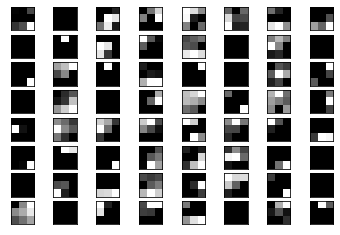

In [95]:
print('Test image')
plt.imshow(test_images[200][:,:,0])
plt.show()

print('Feature maps of 3rd layer')
feature_maps =  extracted_model.predict(test_images)
# plot all 64 maps in an 10x10 squares
square = 8
ix = 1
for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
# show the figure
plt.show()